In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v1.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data
from constants import SP500_TICKER

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                

---

## For **train_model** function

In [4]:
train, test, predict = get_cnn_data(SP500_TICKER)

x_train, y_train, dates_train = train.get_tensors()
x_test, y_test, dates_test = test.get_tensors()
x_predict, y_predict, dates_predict = predict.get_tensors()

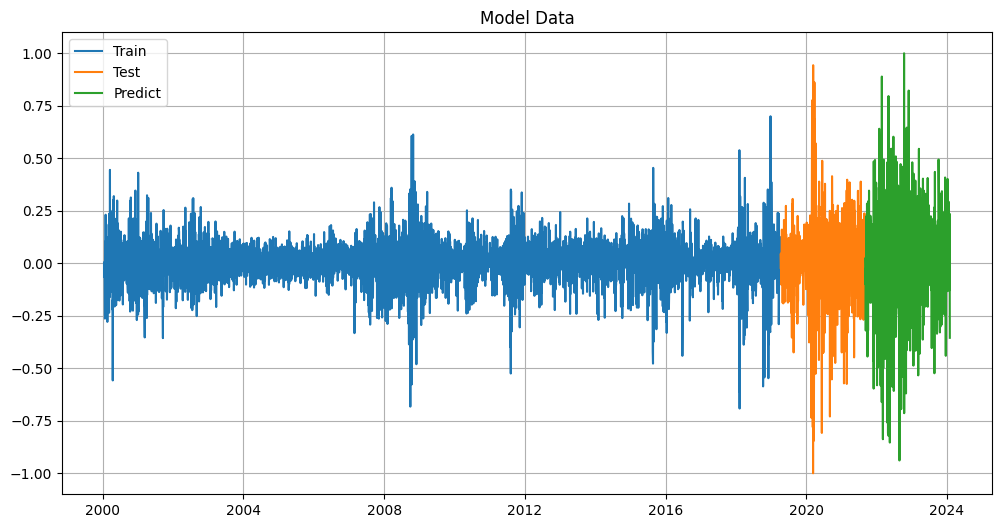

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

In [6]:
# model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
# plot_model_performance(fit_result)
# save_cnn_model(model)

In [7]:
model = load_cnn_model()

19/19 [==============================] - 0s 2ms/step


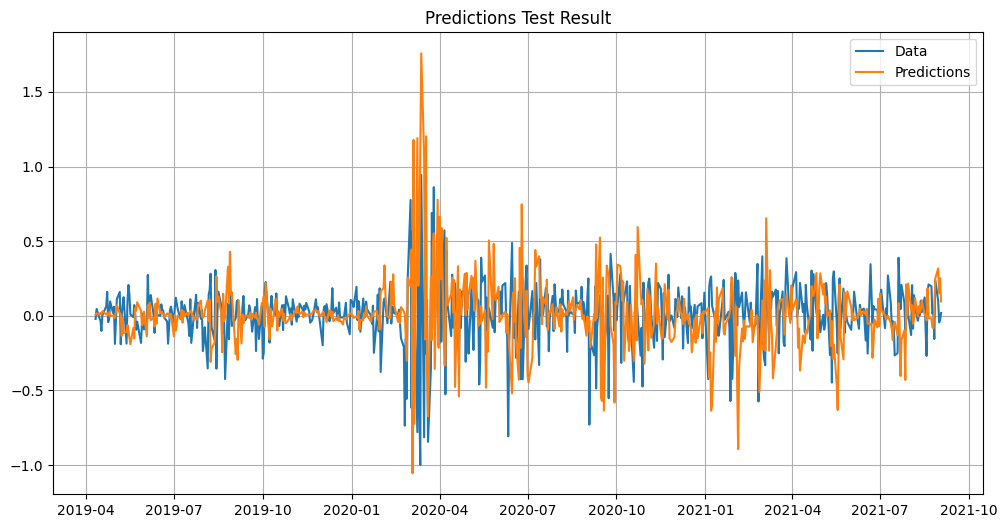

In [8]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(dates_test, y_test)
plt.plot(dates_test, predictions)
plt.legend(['Data', 'Predictions'])

19/19 [==============================] - 0s 3ms/step


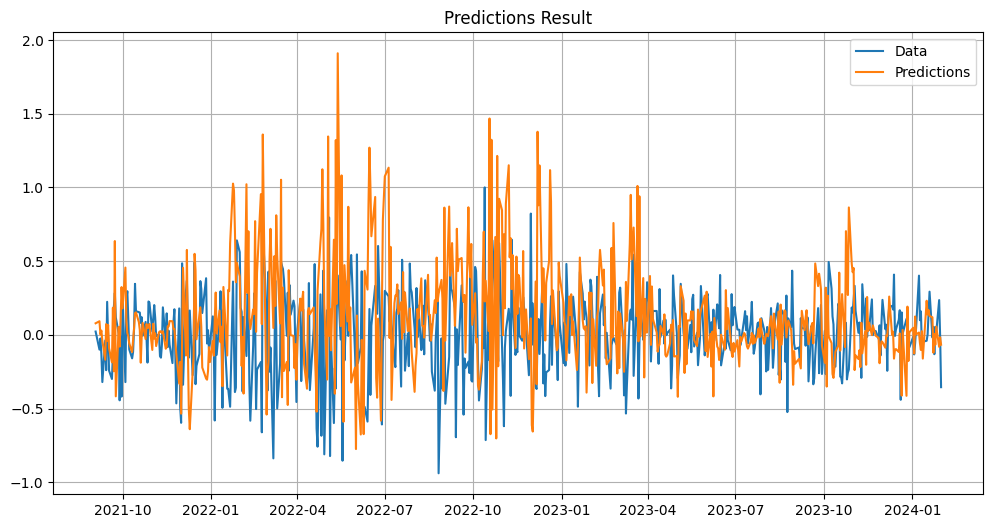

In [9]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions Result')
plt.plot(dates_predict, y_predict)
plt.plot(dates_predict, predictions)
plt.legend(['Data', 'Predictions'])

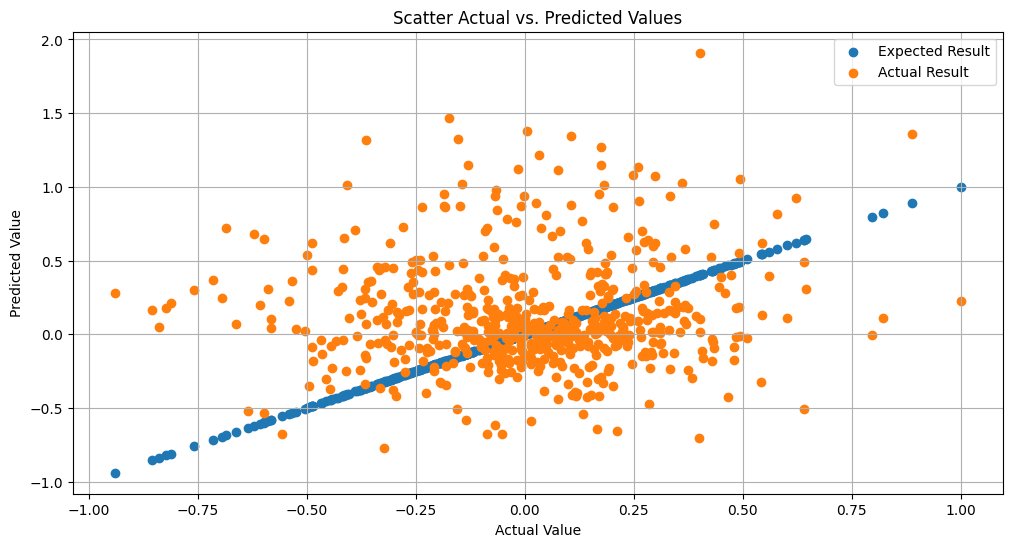

In [10]:
plot_scatter_data(y_predict, predictions)

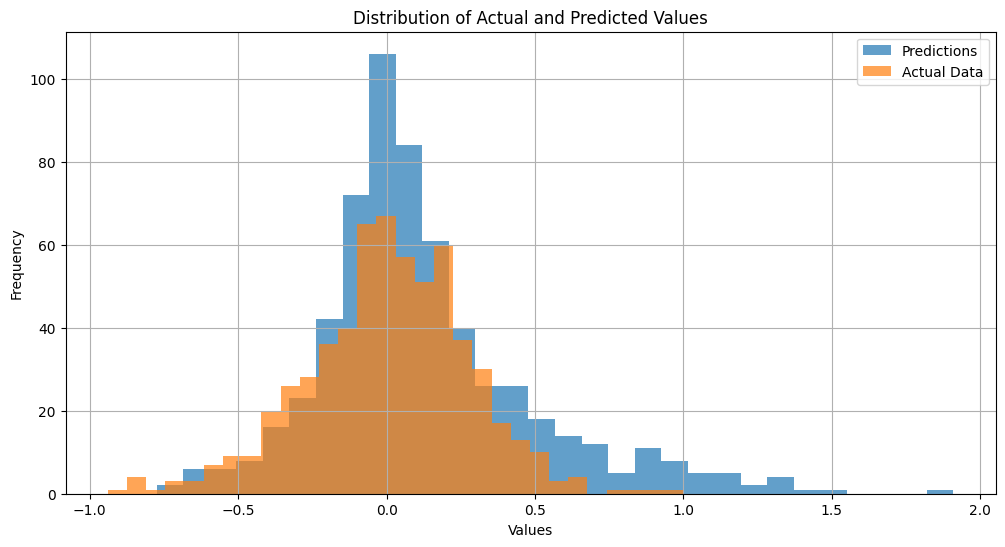

In [11]:
plot_distribution_data(y_predict, predictions)